In [7]:
import os
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
from tqdm import tqdm

In [8]:

# 预设值
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None  # 展示所有列
config = {
    "font.family": 'serif',
    "font.size": 20,
    "mathtext.fontset": 'stix',
    "font.serif": ['Times New Roman'],
    "font.weight": "normal"
}
rcParams.update(config)
chinese_font = {
    'family': 'SimSun',
    'size': 20,
    'weight': 'normal',
}

100%|██████████| 3/3 [00:00<00:00, 70.67it/s]


id: 72
id: 150
id: 28


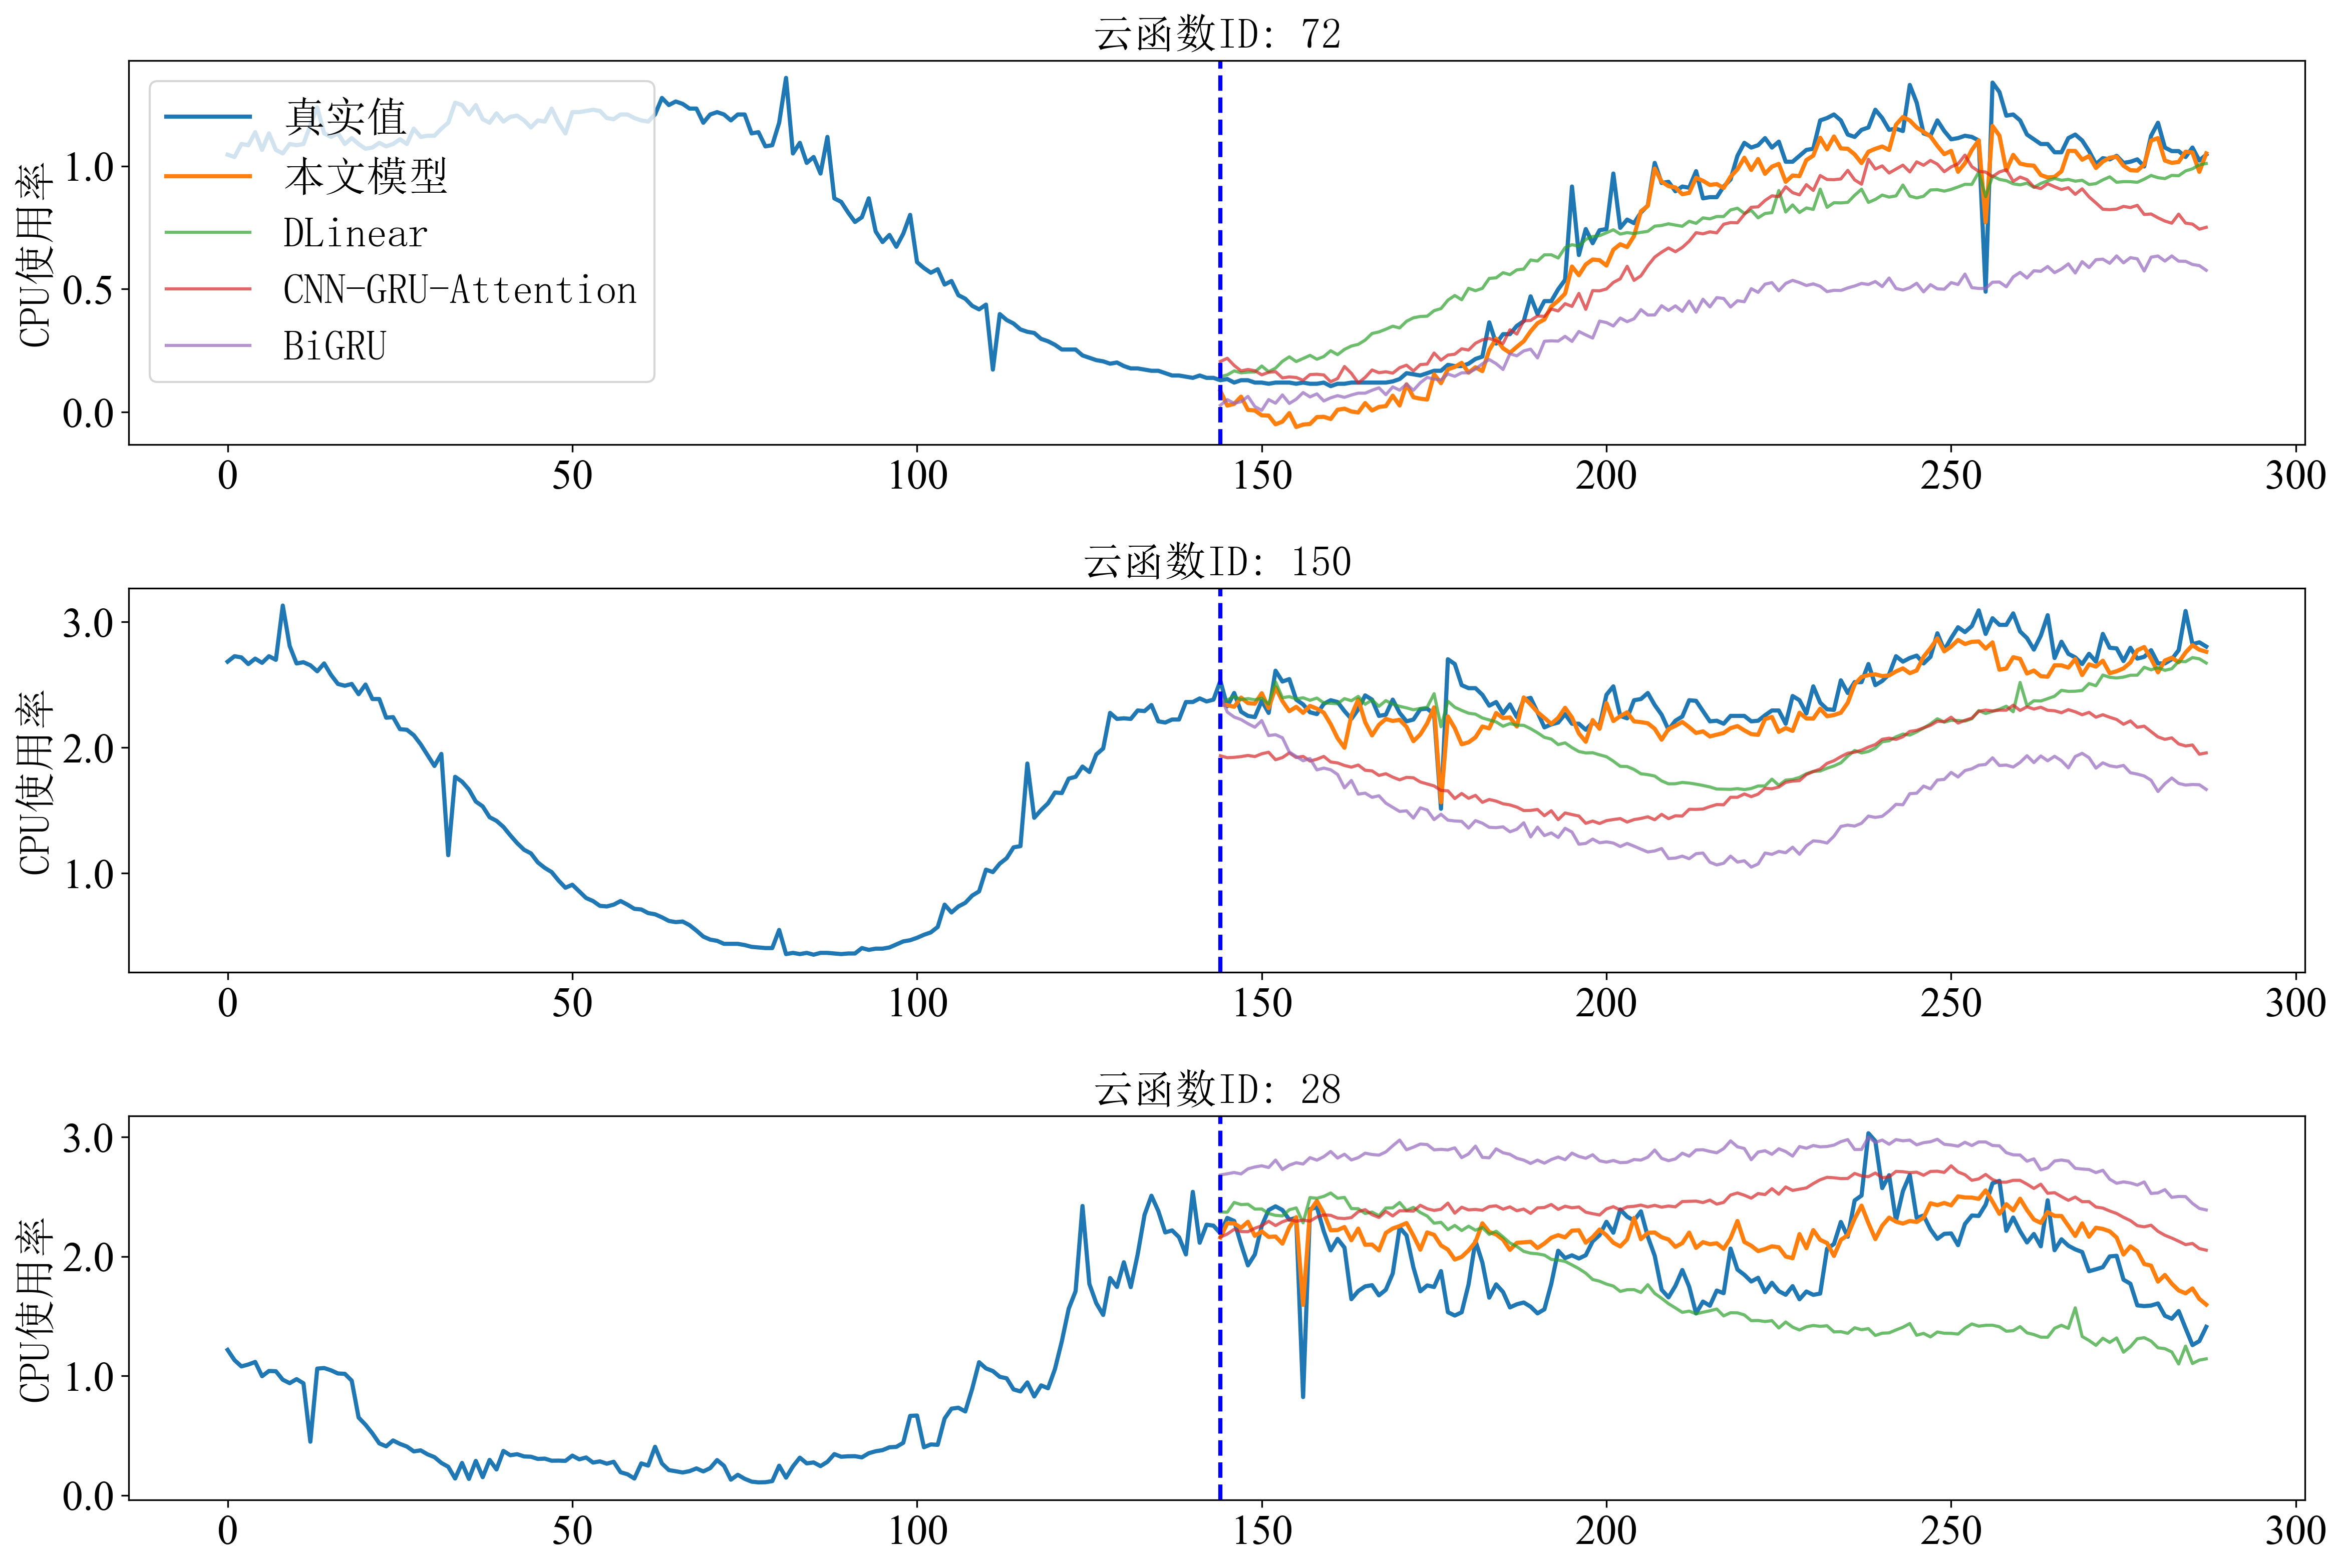

In [21]:
target = [72, 150, 28]
pred_len = 144

plt.figure(dpi=300, figsize=(16, 14))
idx = 1
for func_id in tqdm(target):
    print('id: {}'.format(func_id))
    dsformer_true = np.load(
        './predict_results/huawei/dsformer/{}_true.npy'.format(func_id))

    dsformer_pred = np.load(
        './predict_results/huawei/dsformer/{}_pred.npy'.format(func_id))
    dLinear_pred = np.load(
        './predict_results/huawei/DLinear/{}_pred.npy'.format(func_id))
    cnn_gru_att_pred = np.load(
        './predict_results/huawei/cnn_lstm_att/{}_pred.npy'.format(func_id))
    bi_gru_pred = np.load(
        './predict_results/huawei/lstm/{}_pred.npy'.format(func_id))

    # 绘图
    ax = plt.subplot(4, 1, idx)
    ax.plot(range(len(dsformer_true)), dsformer_true, linewidth=2,
            label='真实值')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dsformer_pred, linewidth=2,
            label='本文模型')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), dLinear_pred, alpha=0.7,
            label='DLinear')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), cnn_gru_att_pred, alpha=0.7,
            label='CNN-GRU-Attention')
    ax.plot(range(len(dsformer_true) - pred_len, len(dsformer_true)), bi_gru_pred, alpha=0.7,
            label='BiGRU')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # 添加图例
    if idx == 1:
        ax.legend(prop=chinese_font, loc='upper left')

    # plt.xlabel('Time Point')
    ax.set_ylabel('CPU使用率', chinese_font)
    # 在特定索引位置画一条直线
    ax.axvline(len(dsformer_true) - pred_len, color='blue', linestyle='--', linewidth=2)
    ax.set_title('云函数ID: {}'.format(func_id), chinese_font)

    idx += 1

plt.tight_layout()
plt.savefig('./predict_results/huawei/' + '{}_forcast_paper.svg'.format('cpu'), format='svg', dpi=1000,
            bbox_inches='tight')
plt.show()


# 读取.npy文件
